In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import pickle as pk
import joblib as jb
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("Height-Width.csv")
df.head()

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [46]:
df.tail()

,Height,Width
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [47]:
df[5:11]

,Height,Width
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926


In [48]:
df['Height'].head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [49]:
df.mean()

Height     69.024411
Width     186.891258
dtype: float64

In [50]:
df.Width.mean()

186.891257979463

In [51]:
df.describe()

,Height,Width
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [52]:
df.Width.std()

19.903131631122328

In [53]:
df.shape

(3501, 2)

In [54]:
row,col = df.shape
row

3501

In [55]:
col

2

In [56]:
df.isnull()

,Height,Width
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [57]:
df.isnull().sum()

Height    0
Width     0
dtype: int64

Text(0.5, 1.0, 'Height Plot')

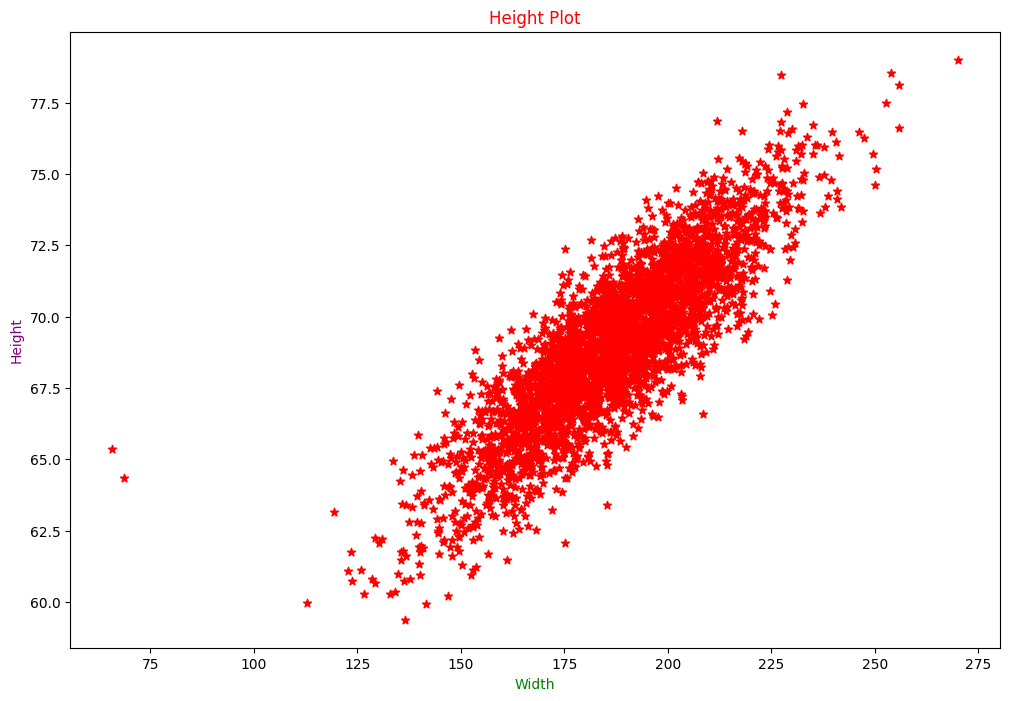

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(df.Width,df.Height, marker="*", color="red")
plt.xlabel("Width", color="green")
plt.ylabel("Height", color="purple")
plt.title("Height Plot",color="red")

In [59]:
x = df[['Width']]
x.head()

,Width
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [60]:
y = df['Height']
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [61]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=100)

In [62]:
xtrain.head()

,Width
3294,171.524042
43,161.193433
54,169.737707
2849,158.715870
3336,200.842247


In [63]:
xtest.head()

,Width
2337,192.466355
1983,182.802806
3053,191.497899
576,169.326284
1361,194.073975


In [64]:
ytrain.head()

3294    66.733634
43      66.090177
54      66.990944
2849    66.778724
3336    70.406172
Name: Height, dtype: float64

Linear Regression

In [65]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [66]:
m=reg.coef_
m

array([0.12467403])

In [67]:
c=reg.intercept_
c

45.72454893886103

In [68]:
y=m*71.19538 + c
y

array([54.60076412])

In [69]:
reg.predict([[71.19538]])

array([54.60076412])

In [70]:
reg.predict(xtest)

array([69.72010578, 68.51531208, 69.59936435, ..., 70.37600882,
       72.59860519, 62.66705783])

In [71]:
pred = reg.predict(xtest)
pred

array([69.72010578, 68.51531208, 69.59936435, ..., 70.37600882,
       72.59860519, 62.66705783])

In [72]:
df["Predicted Result"] = reg.predict(x)

In [73]:
df.head()

,Height,Width,Predicted Result
0,73.847017,241.893563,75.882395
1,68.781904,162.310473,65.960450
2,74.110105,212.740856,72.247809
3,71.730978,220.042470,73.158131
4,69.881796,206.349801,71.451011


In [74]:
mse = mean_squared_error(ytest,pred)
mse

2.3671550444170233

In [75]:
mae = mean_absolute_error(ytest,pred)
mae

1.1903576542058731

Best fit line

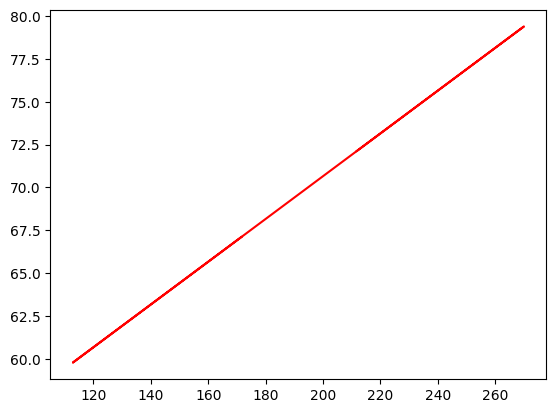

In [76]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

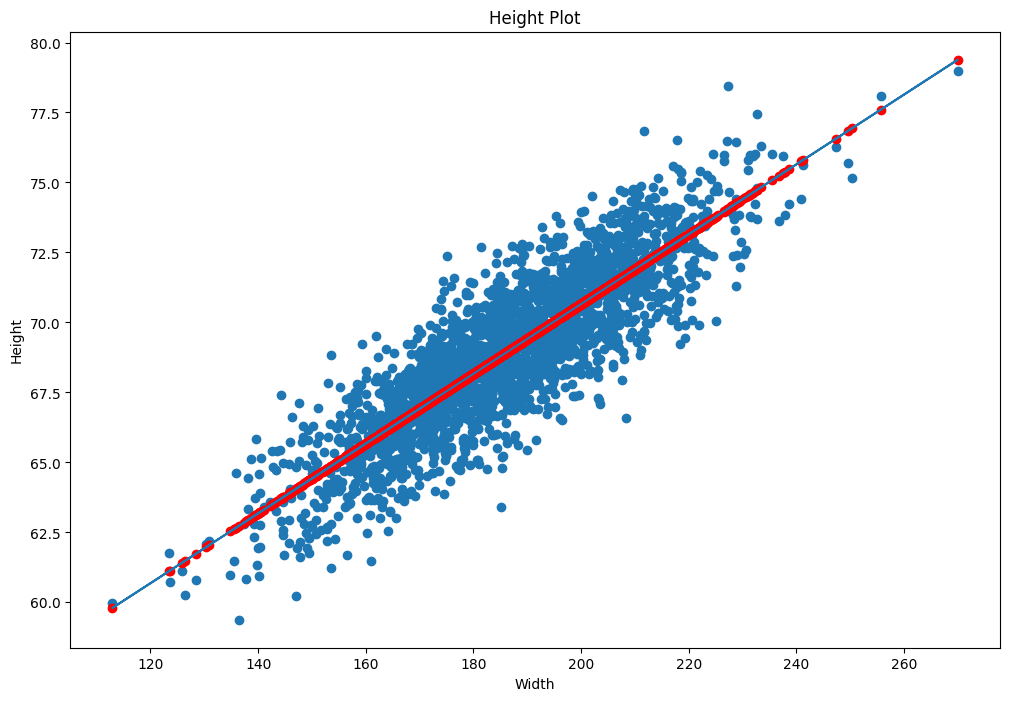

In [77]:
plt.figure(figsize=(12,8))
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Height Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [78]:
r2_score(ytest,pred)

0.7249237432721577

In [79]:
xtest.to_csv("xtest.csv")
ytest.to_csv("yetest.csv")

In [80]:
len(xtest)

1051

Save Model

In [81]:
pk.dump(reg,open("test1","wb"))
reg2 = pk.load(open("test1","rb"))
reg2.predict([[73.84701]])


array([54.93135353])

In [82]:
jb.dump(reg,"test2")

['test2']